In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
location_data = pd.read_csv("./drive/MyDrive/data/arima_weather_conditions.csv")
temperature_data = pd.read_csv("./drive/MyDrive/data/summary_of_weather.csv")

<ipython-input-2-89c73eb3fc18>:3: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  temperature_data = pd.read_csv("./drive/MyDrive/data/summary_of_weather.csv")


In [ ]:
location_data.head()

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333


In [ ]:
temperature_data.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 데이터 살펴보기
> weather_station_location
- WBAN : Weather Station Number 기상 관측소 번호
- NAME : Weather Station Name 기상관측소
- STATE/COUNTRY ID : LOCATION 위치
- LAT : 문자 위도
- LON : 문자 경도
- ELEV : Note that an elevation of 9999 means unknown 고도
- Latitude : 숫자 위도
- Longtitude : 숫자 경도

>weather
- STA :  기상청
- Date : 날짜
- Precip : Precipitation in mm 인치와 100분의 1의 강수량
- MaxTemp : Maximum temperature in degrees Celsius
- MinTemp : Minimum temperature in degrees Celsius
- MeanTemp : Mean temperature in degrees Celsius 섭씨 온도의 평균 온도
- YR : Year of Observation 관찰 연도
- MO : Month of Observation 관찰 달
- DA : Day of Observation 관찰 날
- MAX : Maximum temperature in degrees Fahrenheit 화씨 최대 온도
- MIN : Minimum temperature in degrees Fahrenheit 화씨 최소 온도
- MEA : Mean temperature in degrees Fahrenheit 화씨 평 온도


In [ ]:
location_data.describe()

,WBAN,ELEV,Latitude,Longitude
count,161.000000,161.000000,161.000000,161.000000
mean,33421.440994,439.850932,20.347205,8.364182
std,20826.534394,1745.422339,21.042992,87.420419
min,10001.000000,1.000000,-27.600000,-175.000000
25%,13601.000000,9.000000,8.233333,-60.850000
50%,32906.000000,27.000000,22.333333,9.083333
75%,34150.000000,98.000000,36.116667,67.250000
max,82506.000000,9999.000000,67.016667,177.366667


In [ ]:
temperature_data.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


In [ ]:
a = temperature_data.isna().sum()/len(temperature_data)*100
a

STA              0.000000
Date             0.000000
Precip           0.000000
WindGustSpd     99.553091
MaxTemp          0.000000
MinTemp          0.000000
MeanTemp         0.000000
Snowfall         0.976983
PoorWeather     71.239079
YR               0.000000
MO               0.000000
DA               0.000000
PRCP             1.622984
DR              99.552251
SPD             99.553091
MAX              0.398185
MIN              0.393145
MEA              0.418347
SNF              0.976983
SND             95.326781
FT             100.000000
FB             100.000000
FTI            100.000000
ITH            100.000000
PGT             99.558972
TSHDSBRSGF      71.239079
SD3            100.000000
RHX            100.000000
RHN            100.000000
RVG            100.000000
WTE            100.000000
dtype: float64

In [ ]:
### NA값이 70%가 넘는 행들은 정보성이 약하므로 제외
t_column = a[a.values < 0.5].index
temperature_data = temperature_data[t_column]
temperature_data.head()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,MAX,MIN,MEA
0,10001,1942-7-1,1.016,25.555556,22.222222,23.888889,42,7,1,78.0,72.0,75.0
1,10001,1942-7-2,0,28.888889,21.666667,25.555556,42,7,2,84.0,71.0,78.0
2,10001,1942-7-3,2.54,26.111111,22.222222,24.444444,42,7,3,79.0,72.0,76.0
3,10001,1942-7-4,2.54,26.666667,22.222222,24.444444,42,7,4,80.0,72.0,76.0
4,10001,1942-7-5,0,26.666667,21.666667,24.444444,42,7,5,80.0,71.0,76.0


In [ ]:
temperature_data.Precip.value_counts()
### 무슨 의미인지 모를 T도 존재하여 date 별 강수량을 보고 싶었지만 PASS

0          64267
T          16753
0.254       3389
0.508       2909
0.762       2015
           ...  
123.698        1
106.68         1
126.492        1
123.952        1
161.036        1
Name: Precip, Length: 540, dtype: int64

In [ ]:
### 컬럼 간 상관관계 나 정보등을 살펴볼만한 컬럼은 없음 ex) 위도, 경도, 섭씨, 관측소 번호 등임
### ==> (그리고, 시계열 분석에서는 날짜와 분석할 종속변수 하나만 있으면 가능한듯)!!

In [ ]:
temperature_data.STA.value_counts()

22508    2192
10701    2185
22502    2154
22504    2118
10803    1750
         ... 
42206      50
33123      47
43307      46
34101      31
33121      13
Name: STA, Length: 159, dtype: int64

In [ ]:
location_data[location_data['WBAN']== 22508]
### 정보가 가장 많은 기상 관측소 번호 22508, 기상 관측소명 : WHEELER/AFB 810.1 지역을 위주로 진행 하겠다

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
62,22508,WHEELER/AFB 810.1,HI,2129N,15802W,271,21.483333,-158.05


In [ ]:
data = temperature_data[temperature_data.STA== 22508]

# 시계열 데이터 시각화

- 시계열 데이터 : 시간에 순차적으로 관측한 값들의 집합, 예측 모델에서 시간을 변수로 사용하는 특징이 있다.

- 시계열 데이터 분석 : 과거 데이터의 패턴을 분석하여 미래의 값을 예측하는 방법, 과거의 패턴이 미래에도 지속된다는 데이터의 안정성이 기본적인 가정으로 필요하다.


In [ ]:
### 시계열 데이터 시각화 전에 날짜를 datetime64[ns] 타입으로 변경
data.Date = pd.to_datetime(data.Date)

<ipython-input-14-acb50bd14985>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Date = pd.to_datetime(data.Date)


In [ ]:
print(data.Date.min(), data.Date.max())
### 1940-01-01 00:00:00 1945-12-31 00:00:00 사이 데이터

1940-01-01 00:00:00 1945-12-31 00:00:00


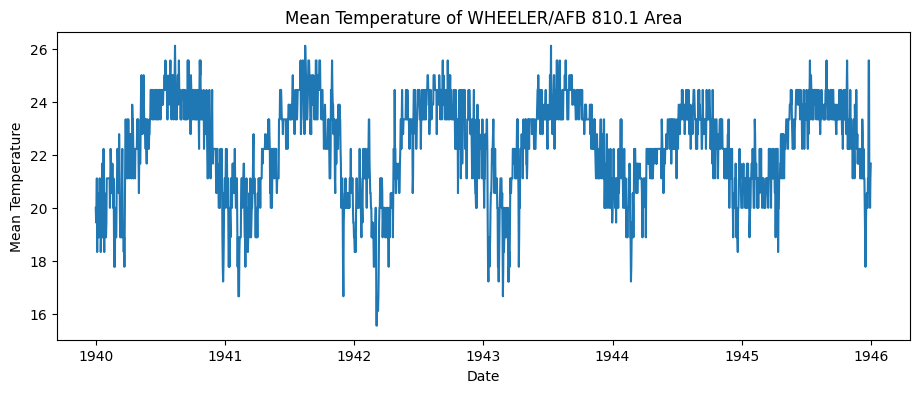

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(11,4))
plt.plot(data.Date, data.MeanTemp)
plt.title("Mean Temperature of WHEELER/AFB 810.1 Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()
### 시간이 지남에 따라, 즉 Trend 가 변화함에 따라, 변동폭이 어떤지 확인한다.
### 약 1년 주기로 매년 강한 계절성을 보인다.

# 시계열 데이터 분해 # EDA 개념

>  시계열 분해법 : 시계열 데이터를 추세/순환/계절/불규칙 요소로 분해하는 기법
- 추세(Trend) : 데이터가 **장기적으로 증가하거나 감소**하는 것이며, 추세가 꼭 선형적일 필요가 없다.
- 순환(Cycle) : 경기변동과 같이 정치, 경제, 사회적 요인으로 인한 변화로, **일정 주기가 없으면서 장기적인 변화 현상**이다
- 계절성(Seasonal) : 주, 월, 분기, 반기 단위 등 **특정 시간의 주기로 나타나는 패턴**이다.
- 불규칙 요소(Random, Residual) : 설명될 수 없는 요인 또는 돌발적인 요인에 의하여 일어나는 변화로,**예측 불가능한 임의의 변동**을 의미한다.
분해법에서는 원래 데이터에서 추세, 순환, 계절성을 뺀 나머지를 불규칙 요소라 한다.

- 계절성과 작은 무작위적 변동(random fluctuation)을 무시하면, 추세-주기가 시계열의 전반적인 움직임을 나타낸다고

In [ ]:
timeSeries = data.loc[:, ["Date", "MeanTemp"]]
timeSeries.set_index("Date", inplace=True)
timeSeries.head()

,MeanTemp
Date,
1940-01-01,20.000000
1940-01-02,19.444444
1940-01-03,20.000000
1940-01-04,21.111111
1940-01-05,18.333333


In [ ]:
timeSeries.index.dtype

dtype('<M8[ns]')

In [ ]:
timeSeries.index

DatetimeIndex(['1940-01-01', '1940-01-02', '1940-01-03', '1940-01-04',
               '1940-01-05', '1940-01-06', '1940-01-07', '1940-01-08',
               '1940-01-09', '1940-01-10',
               ...
               '1945-12-22', '1945-12-23', '1945-12-24', '1945-12-25',
               '1945-12-26', '1945-12-27', '1945-12-28', '1945-12-29',
               '1945-12-30', '1945-12-31'],
              dtype='datetime64[ns]', name='Date', length=2192, freq=None)

In [ ]:
timeSeries.index.values

array(['1940-01-01T00:00:00.000000000', '1940-01-02T00:00:00.000000000',
       '1940-01-03T00:00:00.000000000', ...,
       '1945-12-29T00:00:00.000000000', '1945-12-30T00:00:00.000000000',
       '1945-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
seasonal_decompose?

> seasonal_decompose(x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)
- model : {"additive", "multiplicative"}, optional
    Type of seasonal component. Abbreviations are accepted.
- filt : array_like, optional
    The filter coefficients for filtering out the seasonal component.
    The concrete moving average method used in filtering is determined by
    two_sided.
- period : int, optional
    Period of the series. Must be used if x is not a pandas object or if
    the index of x does not have  a frequency. Overrides default
    periodicity of x if x is a pandas object with a timeseries index.
- two_sided : bool, optional
    The moving average method used in filtering.
    If True (default), a centered moving average is computed using the
    filt. If False, the filter coefficients are for past values only.
- extrapolate_trend : int or 'freq', optional
    If set to > 0, the trend resulting from the convolution is
    linear least-squares extrapolated on both ends (or the single one
    if two_sided is False) considering this many (+1) closest points.
    If set to 'freq', use `freq` closest points. Setting this parameter
    results in no NaN values in trend or resid components.

> 즉 시계열 데이터는 추세, 순환, 계절성, 불규칙 요소로 이루어져 있고 식으로 나타내면
(T_t : 추세와 순환 성분을 묶어서 나타냄)
- 데이터 = 특정 시점 t의 계절 성분 + 추세 및 순환 성분 +  불규칙 요소 #덧셈분해
또는
- 데이터 = 특정시점의 t의 계절 성분 X 추세 및 순환 성분 X 불규칙 요소 #곱셈분해
로 나타낼 수 있다.
- 덧셈 분해는 Trend 와 Seasonal이 별개이고, 곱셈 분해는 Trend 따라 Seasonal 이 변화한다고 보는 시각이다.
- 이는, Python에서는 statsmodels.tsa.seasonl 패키지의 seasonal_decompose() 함수> model 인자에서 additive(덧셈분해) multiplicative(곱셈분해)으로 선택할 수 있다.
- 계절성 요동의 크기나 추세-주기 주위의 변동이 시계열의 수준에 의해 변하지 않으면, 덧셈 분해가 가장 적절합니다. 계절성 패턴에서 변동이나 추세-주기 주위의 변동이 시계열의 수준(level)에 비례하는 것으로 나타날 때는, 곱셈 분해가 더 적절합니다. 흔히 경제 분야 시계열을 다룰 때 곱셈 분해를 사용합니다.

> 주기는 계절성 주기를 기반으로 설정한다.
- 이 계절성 주기는 눈으로 파악하는데, 주별 패턴이 잇는 일별 데이터는 7로 초기 설정을 해보고 보면서 맞춰간다.
- 이 데이터는 계절성 주기가 1년이라 365로 설정하는 것이 바람직하다.

In [ ]:
### 시간이 지남에 따라, 즉 Trend 가 변화함에 따라, 변동폭이 동일하므로-> 덧셈분해가 적절하다. -> (식을 살펴보면 내가 해석하기엔) 추세성분와 계절성분, 불규칙요소가 개별적으로 작동한다는 의미.
### 시간이 지남에 따라, 즉 Trend 가 변화함에 따라, 변동폭이 작아지고 있으므로-> 곱셈분해가 적절하다. -> (식을 살펴보면 내가 해석하기엔) 추세성분과 계절성분, 불규칙요소가 서로 영향을 주고받으며 작동한다는 의미.
### 계절성 요동의 크기나 추세-주기 주위의 변동이 크기 않으면 덧셈분해가 유용하다
### 만약 계절성 패턴의 크기나 추세-주기의 변동이 시간에 따라 변하는 것으로 보이면 곱셈분해가 더 적절할 수 있다. (예: 경제 분야 시계열)

### 1) 덧셈분해(곱샘분해, 덧셈분해 중 하나 선정하면 됨)

In [ ]:
result = seasonal_decompose(timeSeries['MeanTemp'], model='additive',period = 365)
### period지정한 숫자 *2 만큼(2번의 주기)의 시간 데이터는 있어야 해당 시계열 분해가 가능하다 .

<Figure size 640x480 with 0 Axes>

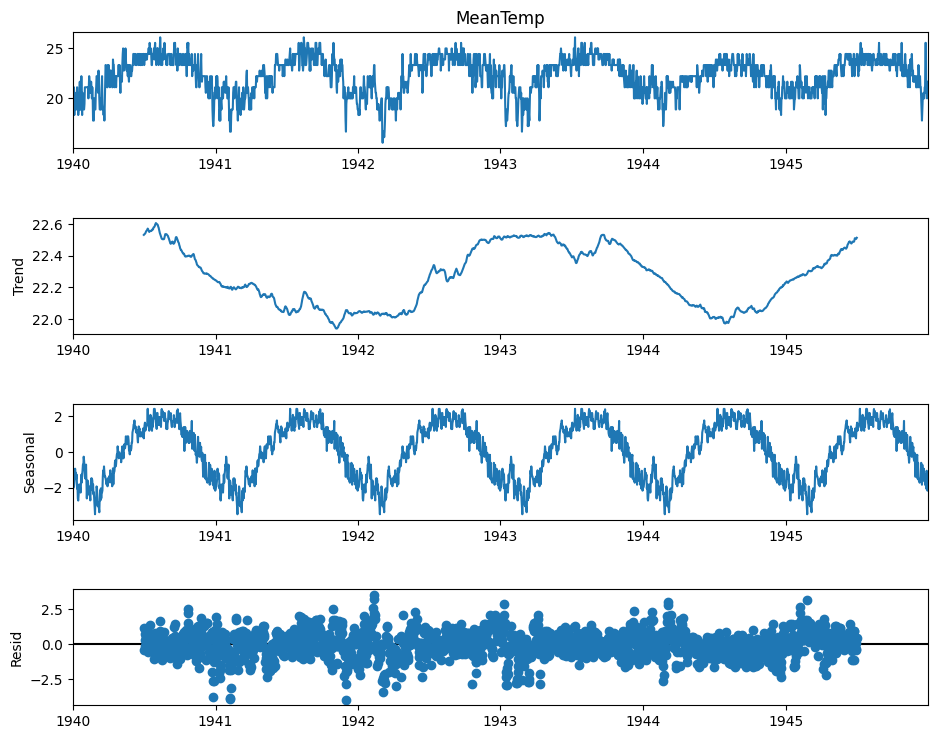

In [ ]:
fig= plt.figure()
fig = result.plot()
fig.set_size_inches(10,8)
### 계절성은 확실히 눈에 띔(파동같은 형태)
### 추세선 역시 패턴을 보이지만 0.6사이 간격을 확대해서 보여주고 있는 것일 수 있음 -> ADF 단위근 검정으로 확인 필요
#residual 평균이 0으로 잘 맞춰져 있음

### 2) 곱셈분해

<Figure size 640x480 with 0 Axes>

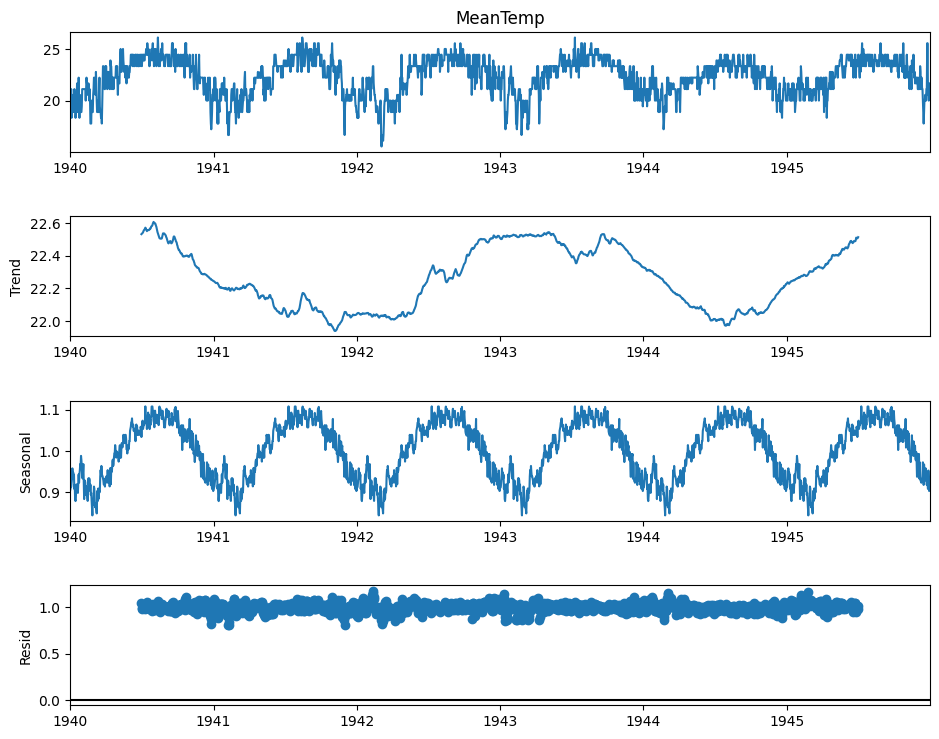

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
result2 = seasonal_decompose(timeSeries['MeanTemp'], model='multiplicative', period = 365)
fig= plt.figure()
fig = result2.plot()
fig.set_size_inches(10,8)
### Seasonal 계절성 이 보임
### 추세선 역시 패턴을 보이지만 0.6사이 간격을 확대해서 보여주고 있는 것일 수 있음 -> ADF 단위근 검정으로 확인 필요
### 그러나 residual 평균이 한껏 1로 맞춰진것으로 보아 덧셈분해가 아닐 수 있음을 확인 가능

In [ ]:
### 만약
### 1. 변동성 체크
### 시각적으로는 시간이 지남에 따라 그래프에서는 변동성이 일정했다면, 덧셈분해일 가능성 높음
### Trend 추세선 및 순환 주기를 살펴 변동폭이 없는지 체크

### 2. 계절성 체크
### 계절성이 있다면 비정상적 시계열이므로 차분 필요

### 3. 추세선 파악
### 추세 패턴이 존재한다면 장기적으로 증가 또는 감소하면서 특정 패턴을 보이면서 함
### 추세선이 있다면 역시 비정상적 시계열이므로 차분 필요

### 4. 정상성 파악
### 변동성이 있다면
### 추세, 계절성이 있다면 데이터의 평균이 달라지므로 정상적인 시계열이 아니며, 정상성을 갖도록 차분이 필요해보인다.
### + 해당 시계열은 추세선과 계절성, 불규칙석 요소 모두가 각각 독립적이다 라고 판단.

# ====================================================
### 만약 2
### 1. 변동성 체크
### 시각적으로는 시간이 지남에 따라 그래프에서는 변동성이 달랐다면, 곱셈분해일 가능성 높음
### 경제 분야의 데이터가 이러한 경우가 많다고 함.
### Trend 추세선 및 순환 주기를 살펴 변동폭이 있는지 체크
### 변동성이 있다면 비정상적 시계열일 수 있음

### 2. 계절성 체크
### 계절성이 있다면 비정상적 시계열이므로 차분 필요

### 3. 추세선 파악
### 추세 패턴이 존재한다면 장기적으로 증가 또는 감소하면서 특정 패턴을 보이면서 함
### 추세선이 있다면 역시 비정상적 시계열이므로 차분 필요

### 3. 정상성 파악
### 먼저 변동성이 있기에 정상적인 시계열이 아니고,
### 추세, 계절성이 있다면 정상적인 시계열이 더더욱 아님.
### 먼저 분산을 맞춰주기 위해 로그변환을 진행한다- > 승법 모델은 로그 변환을 통해 가법 모델(덧셈분해 로그 = 로그 +로그 + 로그)로 쉽게 변환 할 수 있음. # 한번만 하면 변동성이 일정해질 가능성이 높은가봄.
### 그래도 정상성이 만족 안하는지 확인한다.
### 미충족시 만족할때까지 차분한다.
### + 해당 시계열은 추세선과 계절성, 불규칙적 요소 모두가 서로 영향을 받는다 라고 판단.

# 데이터 정상성 확인

> ARIMA : Autoregressive Integrated Moving Average 란 뜻으로, AR(Autoregression)모형과 MA(Moving Averag) 모형을 합친 모형이다.
-**가정 :** 시계열 데이터가 **정상성(Stationary)**를 가정하고 있다.

> **정상성 : 평균, 분산이 시간에 따라 일정한 성질**. 즉, 시계열 데이터 특성이 시간의 흐름에 따라 변하지 않음을 의미한다.
- 추세나 계절성이 있는 시계열은 정상 시계열이 아니다.
- 정상성을 갖지 않는 시계열을 정상성을 갖도록 하는 방법은 로그변환, 차분 등 전처리를 진행할 수 있다.
1. **변동성이 일정하지 않은 경우 -> 로그 변환** -> 변동폭 일정
2. **추세, 계절성이 존재하는 경우 -> 차분** # 단 1차 차분으로 정상성을 띄지 않으면, 차분을 반복한다. -> 평균이 일정
- ADF 검정(Augmented Dickey-Fuller test)으로 정상성을 확인하며,
 H_o(귀무가설) : 자료에 단위근이 존재한다. == 정상성을 만족하지 않는다.

### ACF와 PACF 확인 # 계절성 파악에 도움을 줌

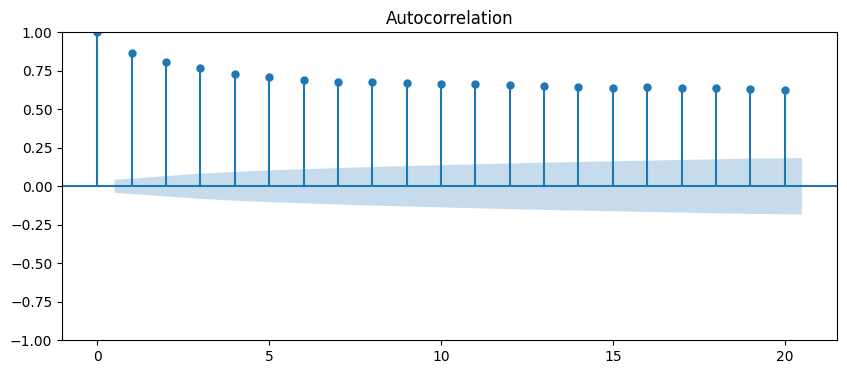

In [ ]:
import statsmodels.api as sm
fig = plt.figure(figsize=(10,4))
ax1= fig.add_subplot(111)
fig = sm.graphics.tsa.plot_acf(timeSeries, lags=20, ax=ax1)
### (천천히 값이 작아진다 == ACF값이 아주 천천히 감소한다 == 정상성을 만족하지 않는다.)
### 천천히 값이 작아진 듯 보이지만, 위에서 ADF 검정에서 p-value가 0.05 넘으므로; 정상성을 만족한다고 판단하겠다.

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


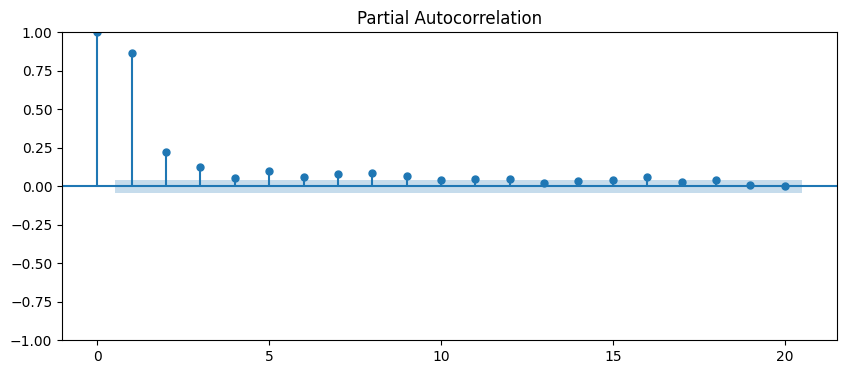

In [ ]:
fig = plt.figure(figsize=(10,4))
ax1= fig.add_subplot(111)
fig = sm.graphics.tsa.plot_pacf(timeSeries, lags=20, ax=ax1)

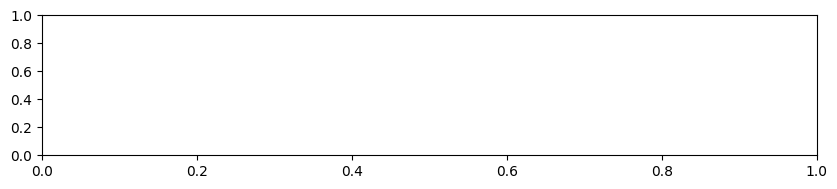

In [ ]:
fig = plt.figure(figsize=(10,4))
ax2 =  fig.add_subplot(211)
fig = sm.graphics.tsa.plot_pacf(timeSeries, lags=20, ax=ax1)

### ADF 단위근 검정 # 추세선 파악에 도움을 줌

In [ ]:
from statsmodels.tsa.stattools import adfuller
result_adf = adfuller(timeSeries)
print('ADF Statistic : %f'% result_adf[0])
print('p-value: %f'% result_adf[1])
print('Critical Values : ')
for key, value in result_adf[4].items() :
  print('Wt%s : %.3f' % (key, value))
### p-value가 0.05를 넘지 않으므로, 귀무가설기각한다. == (추세선에 대해) 정상성을 만족한다.

# statsmodels.tsa.stattools.adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
# 증강된 Dickey-Fuller unit root test.
# #개념자체가 어려움
# x : 테스트할 데이터 계열
# maxlag :테스트에 포함된 최대 지연
# regression : 회귀에 포함할 상수 및 추세 순서
# autolag  0~maxlag 값 중 시차 길이를 자동으로 결정할 때 사용하는 법
# store : adf 통계가 반환여부(derfault=False)
# regresults : 전체 회귀 결과가 반환

ADF Statistic : -3.423749
p-value: 0.010175
Critical Values : 
Wt1% : -3.433
Wt5% : -2.863
Wt10% : -2.567


In [ ]:
### 1. 변동성 체크
### (그래프 변동성에 따라 정상성 미만족시 로그 변환할지 차분할지 달라진다.)
### (변동성이 있다면 trend 따라 영향을 받는 것으로 곱셈분해)
### 시각적으로는 시간이 지남에 따라 그래프에서는 변동성이 일정한지 작아지는지 확실하지 않다.

### 2. 계절성 파악
### (계절성이 있으면 우선적으로 비정상적 시계열이 확정임)
### 계절성이 1년 주기로 띄고 있음을 확인할 수 있음

### 3. 추세선 파악
### (추세선, 계절성, 데이터가 서로 영향을 받는다는 시각과 추세선,계절성, 데이터가 상관이 없어보인다는 시각을 구분해서 분해 방식이 달라진다.)
### 곱셈분해 또는 덧셈분해 둘다 보았을 때 모두 추세 패턴(내려갔다 올라갔다 다시 내려감 반복).
### 그러나 residual이 평균0을 잘 맞추고 있는 덧셈분해가 맞아보임
### 더불어 ADF 단위근 검정에서 p-value가 0.05보다 작으므로 귀무가설인 정상성을 만족하지 않는다를 기각하는 것으로 판단할 수 있음
### 이말은 즉 1. 변동성 체크에서 내가 확신을 갖지 못했던 데이터 변동성이 크지 않다는 걸 의미하므로 로그치환까진 할 필요가 없다는 뜻.

### 3. 정상성 파악
### 추세, 계절성이 있다면 정상적인 시계열이 아니며, 정상성을 갖도록 차분이 필요해보인다.

### IF 로그 치환을 한다면(정상성 만족 시 할 필요 없음)

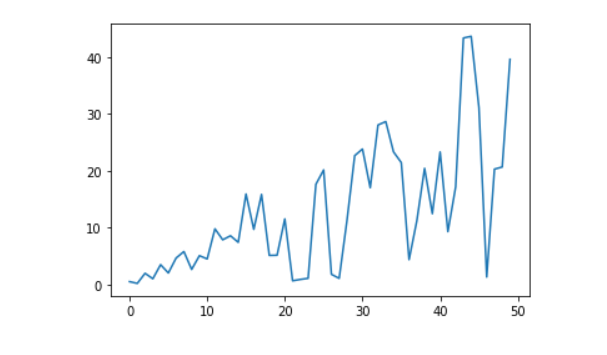![image.png]()
```
### 로그변환은 Numpy의 log 함수를 이용하여 변환하며 큰 값은 작게, 작은 값은 크게 조정됩니다.

### 로그변환 데이터를 scale하였습니다. scale 후 Y축이 0값 전후로 데이터가 이동되었으나 추세는 남아있습니다.

# 로그함수
list_a = np.log(list_a)
plt.plot(list_a)
plt.show()

from sklearn import preprocessing
list_a = preprocessing.scale(list_a)
plt.plot(list_a)
plt.show()
### 보통의 경우, 로그만으로는 안정시계열로 변환되진 않습니다.
### 로그함수를 취한 다음 차분(diff) 해야합니다.

### sklearn.preprocessing.scale(X)
### 모든 축을 따라 데이터셋을 표준화 한다.
### 단위 분산(분산1)에 대한 평균을 중심 0으로 맞춤.

### X : 중앙에 배치하고 확장할 데이터
### axis : 평균 및 표준편차를 계산하는데 사용되는 축.

```

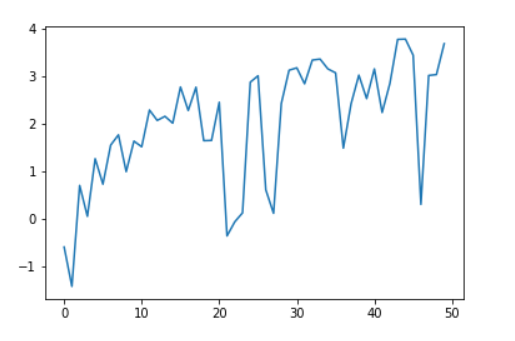

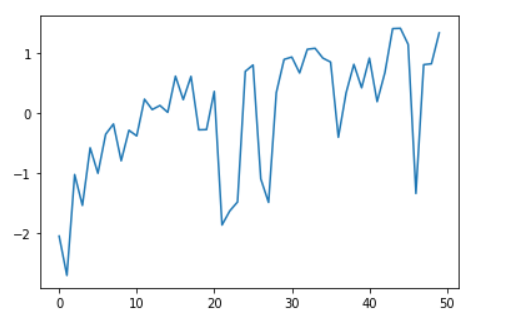

### 1차 차분(정상성 만족 시 할 필요 없음)

> 1차 차분 코드


```
ts_diff = timeSeries - ts.shift()
plt.figure(figsize=(11,4))
plt.plot(ts_diff)
plt.title("Differencing method")
plt.xlabel("Date")
plt.ylabel("Differencing Mean Temperature")
plt.show()

result_adf2 = adfuller(ts_diff[1:])
print('ADF Statistic : %f'% result_adf2[0])
print('p-value: %f'% result_adf2[1])
print('Critical Values : ')
for key, value in result_adf2[4].items() :
  print('Wt%s : %.3f' % (key, value))
```




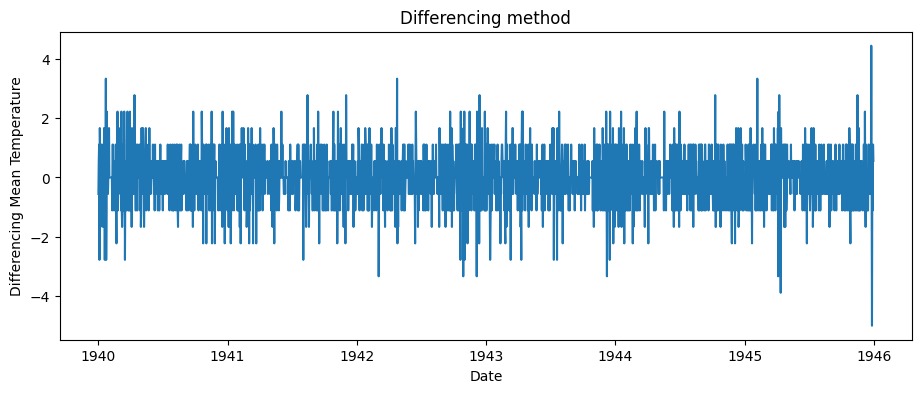

ADF Statistic : -17.182473
p-value: 0.000000
Critical Values : 
Wt1% : -3.433
Wt5% : -2.863
Wt10% : -2.567


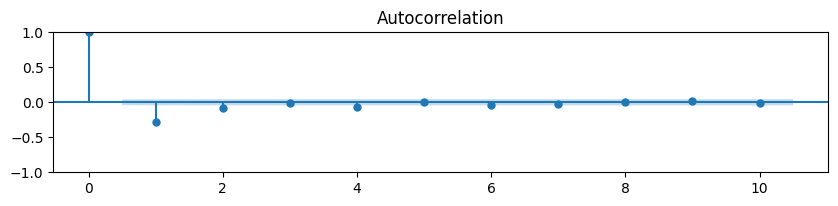

In [ ]:
ts_diff = timeSeries - timeSeries.shift() # default 값 1. 1행이 2행으로 2행이 3행으로 1행씩 밀려남.
plt.figure(figsize=(11,4))
plt.plot(ts_diff)
plt.title("Differencing method")
plt.xlabel("Date")
plt.ylabel("Differencing Mean Temperature")
plt.show()

result_adf2 = adfuller(ts_diff[1:])
print('ADF Statistic : %f'% result_adf2[0])
print('p-value: %f'% result_adf2[1])
print('Critical Values : ')
for key, value in result_adf2[4].items() :
  print('Wt%s : %.3f' % (key, value))

fig = plt.figure(figsize=(10,4))
ax1= fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_diff[1:], lags=10, ax=ax1)  # 반드시 차분 후에는 슬라이싱 [차분한 수:] 해주기
### 1차 차분 후 ADF 검정의 p-value를 확인해 정상성 만족하는지 확인. 만족하지 않다면 -> 한번 더 차분-> 한번 더 차분

In [ ]:
timeSeries.head()

,MeanTemp
Date,
1940-01-01,20.000000
1940-01-02,19.444444
1940-01-03,20.000000
1940-01-04,21.111111
1940-01-05,18.333333


In [ ]:
ts_diff.head() # 1차 차분하면 첫 행이 NaN 다음행 - 이전행이므로

,MeanTemp
Date,
1940-01-01,NaN
1940-01-02,-0.555556
1940-01-03,0.555556
1940-01-04,1.111111
1940-01-05,-2.777778


# ARIMA 의 p,q 결정

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


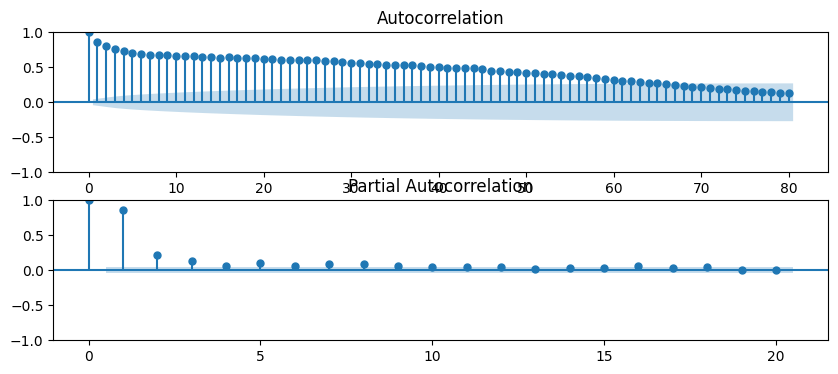

In [ ]:
import statsmodels.api as sm
fig= plt.figure(figsize=(10,4))
ax1= fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(timeSeries, lags=80, ax = ax1)
ax2= fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(timeSeries, lags=20, ax = ax2)
### ACF가 대체 0으로 줄어들 생각으 안하네;;
### ACF 유의미한 자기상관이 존재한다.
### --> 추세선이 없다고 판단되어도 계절성이 있기 때문에 비정상 시계열임을 의미한다.

> 시계열
- 오늘의 데이터가 내일의 데이터에 영향을 준다.
- 과거를 분석하여 미래를 예측하기 위함이다.

>AR #자기 회귀 모형
- p 시점 전의 자료가 현재 자료에 영향을 주는 자기회귀모형(autogressive model) 이하 AR(p) 모형이라 함
- 과거의 값이 현재의 값을 결정한다
- 과거의 값 외에 잡음이 섞여 데이터가 생겨났다면 잡음을 제거

>MA #이동평균 모형
- 과거 잘 알 수 없는 원인이 겹쳐서 현재의 데이터가 생겨났다고 생각함
- 충격에 의해 데이터가 일시적으로 정상값과 떨어져서 그것이 다시 정상값으로 향하는 움직임을 표현함.
- 충격을 제거
- ex) 주변에 축제가 있어 당일에 손님수가 늘어나는 반면, 다음날과 그 다음날에는 반동으로 손님 수가 줄을것.-> 이때 충격이 그 둘째 날까지 영향을 남긴다고 하는 점에서 MA(2)모델을 추정하여 손님수를 예상하면 된다.
- 이동평균모형은 유한한 개수의 백색잡음의 결합이므로 언제나 정상성을 만족한다고 함.(# 정확히 무슨뜻일까.)


> ARIMA
- AR(pacf 로 결정, p), MA(acf로 결정, q)
- ARMA(p,q)는 정상성을 만족하고, ARIMA(p,d,q)는 비정상성 시계열 모형일때 사용.
- ARMA 또는 ARIMA(I는 차분)로 살펴본다면 acf, pacf 모두 서서히 0으로 감소하는 형태임
- 0에 접근하여 acf는 q를, pacf는 p 를  결정지어줌.

|확률과정|한글명|정의|ACF|PACF|
|---|:---|:---:|:---:|:---:|
|한글명|||자기상관계수|부분(편)상관계수|
|정의|||k기간 떨어진 값들의 상관 계수|서로 다른 두 지점 사이의 관계를 분석할때, 중간에 있는 값들의 영향을 제외시킨 상관계수|
|AR(p)|자기회귀모형|과거의 값 외에 잡음 존재|지수적으로 감소하거나 소멸하는 싸인함수 형태|시차 p이후에는 0으로의 절단형태|
|MA(q)|이동평균모형|알수없는 충격이 존재|시차 q이후에는 0으로의 절단형태|지수적으로 감소하거나 소멸하는 싸인함수 형태|
|ARIMA(p,q)||이동평균을 누적한 자기회귀|시차(q-p)이후에는 지수적으로 감소하거나 소멸하는 사인함수 형태|시차(p-q)이후에는 지수적으로 감소하거나 소멸하는 싸인함수 형태|

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


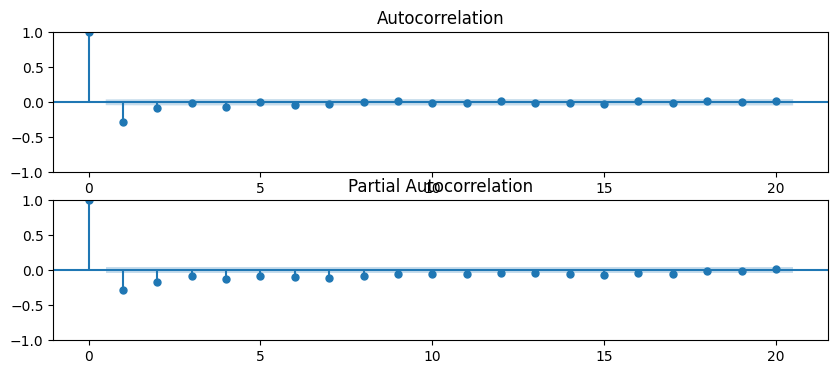

In [ ]:
import statsmodels.api as sm
fig= plt.figure(figsize=(10,4))
ax1= fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(ts_diff[1:], lags=20, ax = ax1)
ax2= fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(ts_diff[1:], lags=20, ax = ax2)
### ACF와 PACF 모두 모두 점진적으로 0에 이르고 있다.
### ACF는 시차2에 0에 가까워지고, PACF도 시차3에 0에 수렴했다.
### 절단점 -1씩 해야 p, q 값이 구해진다.
### 따라서, AR(1), MA(2), ARIMA(1,2) 등의 모델을 활용할 수 있다.
### 파란 영역안으로 들어오면됨

# ARIMA 수행

In [ ]:
### ARIMA(1,1,1) 모델 시도
### ARIMA(2,1,2) 모형인 경우, ARIMA(2,1,2) base model로, ARIMA(2,1,1), ARIMA(1,1,2) 도 시도해볼 수 있다.

In [ ]:
test_data = data[data['Date']>=pd.to_datetime('1944-01-01')]
test_data.head()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,MAX,MIN,MEA
59338,22508,1944-01-01,1.524,23.888889,16.111111,20.000000,44,1,1,75.0,61.0,68.0
59339,22508,1944-01-02,2.032,23.888889,17.777778,21.111111,44,1,2,75.0,64.0,70.0
59340,22508,1944-01-03,0.508,23.888889,18.888889,21.111111,44,1,3,75.0,66.0,70.0
59341,22508,1944-01-04,0.762,24.444444,19.444444,22.222222,44,1,4,76.0,67.0,72.0
59342,22508,1944-01-05,1.778,25.000000,16.666667,21.111111,44,1,5,77.0,62.0,70.0


In [ ]:
### 1940-01-01 00:00:00 1945-12-31 00:00:00 사이 데이터
### 5년 중 1년은 test로
from statsmodels.tsa.arima_model import ARIMA
#fit model
model = ARIMA(timeSeries, order=(1,1,2))
model_fit= model.fit(disp=0)
# predict
forcast = model_fit.predict(start=pd.datetime(1944, 1,1), end = pd.datetime(1945, 12,31), typ='levels') #차분이 들어간 모델의 경우 levels로 설정. 그렇지 않으면 default는 linear인데 차분한 ts_diff에 대한 결과를 내는 것과 같음.
plt.figure(figsize=(11,4))
plt.plot(data.Date, data.MeanTemp, label= "original")
plt.plot(forcast,label= "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

NotImplementedError: ignored

In [ ]:
data.head()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,MAX,MIN,MEA
57877,22508,1940-01-01,0.254,23.333333,17.222222,20.000000,40,1,1,74.0,63.0,68.0
57878,22508,1940-01-02,10.16,23.333333,16.111111,19.444444,40,1,2,74.0,61.0,67.0
57879,22508,1940-01-03,T,23.888889,15.555556,20.000000,40,1,3,75.0,60.0,68.0
57880,22508,1940-01-04,2.286,23.888889,18.333333,21.111111,40,1,4,75.0,65.0,70.0
57881,22508,1940-01-05,0.254,22.222222,15.000000,18.333333,40,1,5,72.0,59.0,65.0


###1) p,d,q = 0,1,2

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
<ipython-input-73-2a3cbe9bc359>:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  forcast = model_fit.predict(start=pd.datetime(1944, 1,1), end = pd.datetime(1945, 12,31), typ='levels')


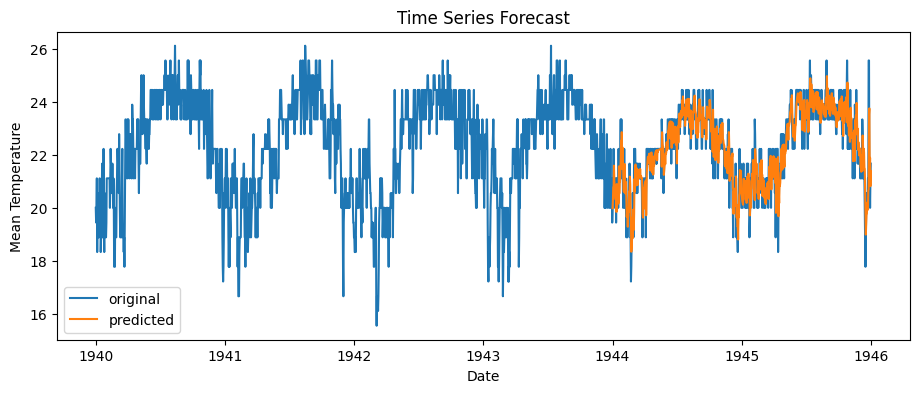

In [ ]:
###  "statsmodels\tsa\arima_model"의 사용 중단으로 인해 발생합니다.
### 대신 다음을 사용하여 통계 모델을 가져옵니다.
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(timeSeries, order=(0,1,2)) #datetimeIndex인 데이터
model_fit= model.fit()
# predict
forcast = model_fit.predict(start=pd.datetime(1944, 1,1), end = pd.datetime(1945, 12,31), typ='levels')
### [주의!!!] 차분이 들어간 모델의 경우 typ 인자 값levels로 설정.
### [주의!!!] 그렇지 않으면 default는 linear는 주어진 데이터에 한번 더 차분한 결과(ts_diff)를 내는 것과 같음.
plt.figure(figsize=(11,4))
plt.plot(data.Date, data.MeanTemp, label= "original") # index가 date 가 아닌 일반적인 데이터
plt.plot(forcast,label= "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

### 2) p,d,q = 1,1,0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
<ipython-input-55-385f0098e309>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  forcast = model_fit.predict(start=pd.datetime(1944, 1,1), end = pd.datetime(1945, 12,31), typ='levels')


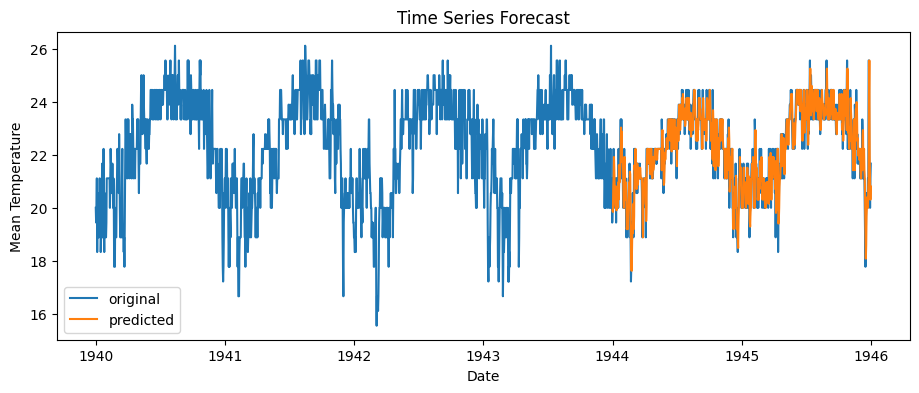

In [ ]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(timeSeries, order=(1,1,0)) #datetimeIndex인 데이터
model_fit= model.fit()
# predict
forcast = model_fit.predict(start=pd.datetime(1944, 1,1), end = pd.datetime(1945, 12,31), typ='levels')
### [주의!!!] 차분이 들어간 모델의 경우 typ 인자 값levels로 설정.
### [주의!!!] 그렇지 않으면 default는 linear는 주어진 데이터에 한번 더 차분한 결과(ts_diff)를 내는 것과 같음.
plt.figure(figsize=(11,4))
plt.plot(data.Date, data.MeanTemp, label= "original") # index가 date 가 아닌 일반적인 데이터
plt.plot(forcast,label= "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

### 3) p,d,q = 1,1,2

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
<ipython-input-78-34d05d9e06a0>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  forcast = model_fit.predict(start=pd.datetime(1944, 1,1), end = pd.datetime(1945, 12,31), typ='levels')


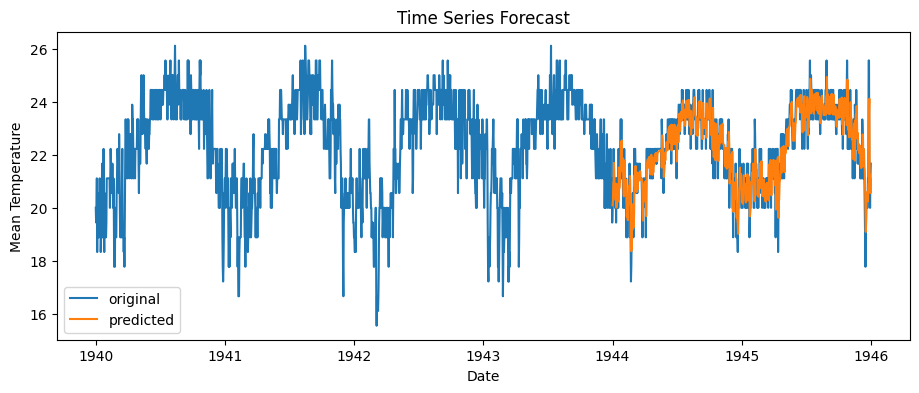

In [ ]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(timeSeries, order=(1,1,2)) #datetimeIndex인 데이터
model_fit= model.fit()
# predict
forcast = model_fit.predict(start=pd.datetime(1944, 1,1), end = pd.datetime(1945, 12,31), typ='levels')
### [주의!!!] 차분이 들어간 모델의 경우 typ 인자 값levels로 설정.
### [주의!!!] 그렇지 않으면 default는 linear인데 차분한 ts_diff에 대한 결과를 내는 것과 같음.
plt.figure(figsize=(11,4))
plt.plot(data.Date, data.MeanTemp, label= "original") # index가 date 가 아닌 일반적인 데이터
plt.plot(forcast,label= "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
<ipython-input-79-17121fb430c7>:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  forcast = model_fit.predict(start=pd.datetime(1944, 1,1), end = pd.datetime(1945, 12,31), typ='levels') #차분이 들어간 모델의 경우 levels로 설정. 그렇지 않으면 default는 linear인데 차분한 ts_diff에 대한 결과를 내는 것과 같음.


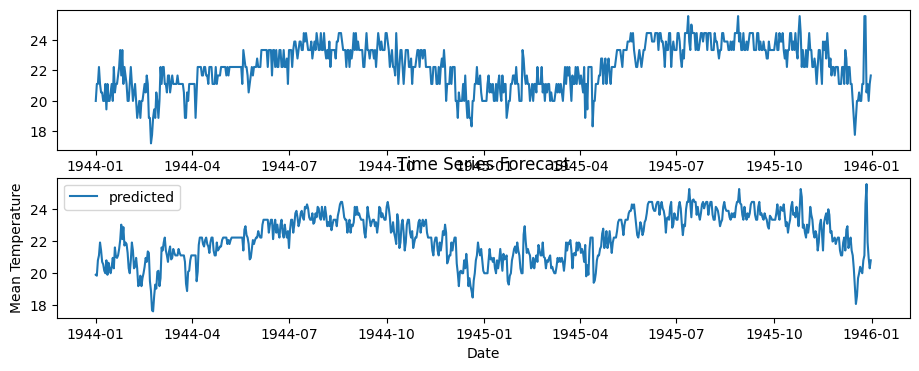

In [ ]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(timeSeries, order=(1,1,0))
model_fit= model.fit()
# predict
forcast = model_fit.predict(start=pd.datetime(1944, 1,1), end = pd.datetime(1945, 12,31), typ='levels') #차분이 들어간 모델의 경우 levels로 설정. 그렇지 않으면 default는 linear인데 차분한 ts_diff에 대한 결과를 내는 것과 같음.
fig = plt.figure(figsize=(11,4))
ax= fig.add_subplot(211)

ax.plot(test_data.Date, test_data.MeanTemp, label= "original") # index가 date 가 아님
ax2= fig.add_subplot(212)
ax2.plot(forcast,label= "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

# 잔차 분석

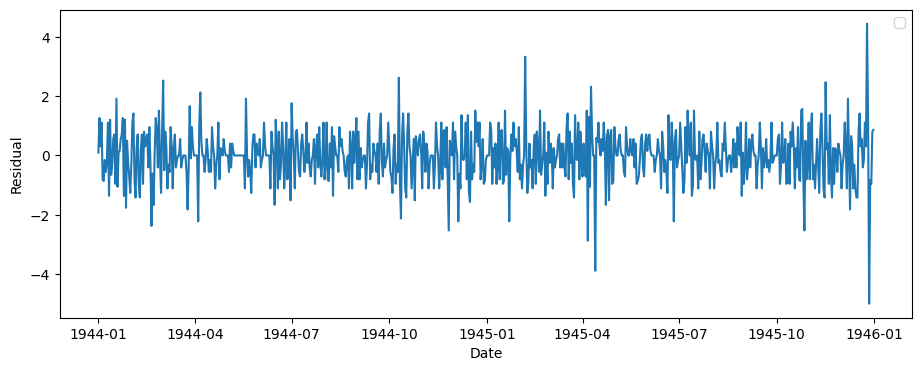

In [ ]:
### 잔차 시각화
import numpy as np
resi = np.array(test_data.MeanTemp) - np.array(forcast)

plt.figure(figsize=(11,4))
plt.plot(test_data.Date, resi) # x축값, y축값
plt.xlabel("Date")
plt.ylabel("Residual")
plt.legend()
plt.show()

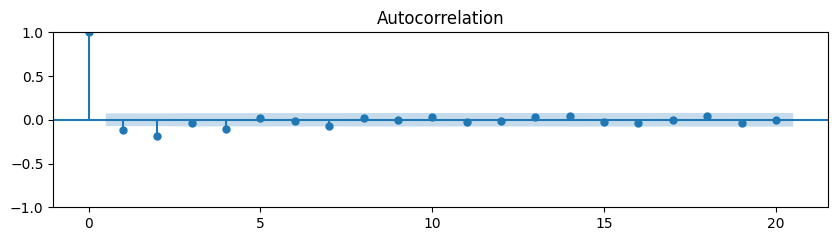

In [ ]:
fig= plt.figure(figsize=(10,5))
ax1= fig.add_subplot(211)
fig= sm.graphics.tsa.plot_acf(resi, lags=20, ax=ax1)
### 잔차에 계절성 없음

In [ ]:
result_resi=adfuller(resi)
print('ADF Statistic : %f'% result_resi[0])
print('p-value: %f'% result_resi[1])
print('Critical Values : ')
for key, value in result_adf[4].items() :
  print('Wt%s : %.3f' % (key, value))
### 잔차에 추세선 없음

ADF Statistic : -12.182323
p-value: 0.000000
Critical Values : 
Wt1% : -3.433
Wt5% : -2.863
Wt10% : -2.567


# 성능 확인

In [ ]:
from sklearn import metrics
def scoring(y_true, y_pred) :
  r2 = round(metrics.r2_score(y_true, y_pred)*100,3)
  corr = round(np.corrcoef(y_true, y_pred)[0,1],3)
  mape = round(metrics.mean_absolute_percentage_error(y_true, y_pred)*100,3)
  rmse = round(metrics.mean_squared_error(y_true, y_pred, squared=False), 3)

  df = pd.DataFrame({
      'R2': r2,
      'Corr' : corr,
      'RMSE' : rmse,
      'MAPE' : mape
  }, index=[0])
  return df

In [ ]:
### p,d,q = 0,1,2
scoring(np.array(test_data.MeanTemp), np.array(forcast))

,R2,Corr,RMSE,MAPE
0,69.662,0.838,0.82,2.849


In [ ]:
### p,d,q = 1,1,0
scoring(np.array(test_data.MeanTemp), np.array(forcast))

,R2,Corr,RMSE,MAPE
0,66.387,0.826,0.863,2.95


In [ ]:
### p,d,q = 1,1,2
scoring(np.array(test_data.MeanTemp), np.array(forcast))
### p,d,q 가 (1,1,2)일때가 가장 정확해보임

,R2,Corr,RMSE,MAPE
0,70.452,0.841,0.809,2.822
